<a href="https://colab.research.google.com/github/juanjosemarinm/SyS2025-2/blob/main/EJERCICIO_CLASE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se tiene un microprocesador de 4 bits con entrada
analoga entre -3.3 y 3.3 [v]. Describa las condiciones necesarias para que el microprocesador pueda digitalizar la señal x(t) = 30 cos(100πt). Presente una simulacion en Python de dicho proceso para tres ciclos de
la señal x(t).

2.6697560814373267 14 2.8600000000000003


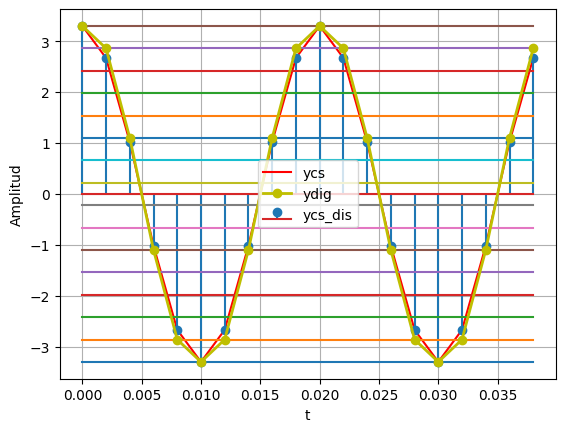

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#Ejemplo de señal despues de cero y pendiente y discretización
#Recuerde que el proceso de discretización debe ser implementado
from scipy.spatial.distance import cdist

def my_ceropen(x,ymin = -3.3, ymax = 3): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

#señal original
Fo = 50
To = 1/Fo
A = 30
Fs = 10*Fo #asegurar nyquist
Ts = 1/Fs
tv = np.arange(0,2*To,Ts)#procesar dos periodos discretizados
y = A*np.cos(2*np.pi*Fo*tv)

#cero y pendiente
ycs = my_ceropen(y, ymin=-3.3,ymax=3.3)

#número de bits y vector de cuantización
nbits = 4
rmin = -3.3
rmax = 3.3
ve = np.linspace(rmin,rmax,2**nbits) # (rmax-rmin)/(2^#bits - 1) -> si se quiere incluir rmin y rmax

#distancias y cero pendiente a vector cuantizacion
d = cdist(ycs.reshape(-1,1),ve.reshape(-1,1)) #se utiliza reshape(-1,1) para generar vectores columna como lo pide cdist
d.shape # d es una matriz de 500 x 8, ej: la fila 1 incluye la distancia euclidea entre y[0] y los 8 elementos en ve
#se requiere identificar el elemento ve[j] más cercano a y[i] para genera señal cuantizada
ind = np.argmin(d,axis=1) #el parámetro axis = 1 indica que busca la posición a lo largo de las columnas del elemento más pequeño en cada fila
ind
print(ycs[1],ind[1],ve[ind[1]]) # para y[50] = 0.58, el estado más cercano en ve es el elemento 1 que corresponde a ve[1]=0.71
#función cuantización punto a punto

def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]
  #recorrer vector cero y spam discretizado para cuantizar

for i in range(ycs.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(ycs[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(ycs[i],ve)) #apilar datos cuantizando si i>0
     #graficar señales

plt.plot(tv,ycs,c='r', label='ycs')#cs continua

plt.stem(tv,ycs, label='ycs_dis')#cs discreta

#estados de cuantización

for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()